In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
df = pd.read_csv("/content/drive/MyDrive/ML/House-Price-Prediction/Shouse.csv")

In [73]:
df.isnull().sum()

Area (sqft)    0
Price          0
dtype: int64

In [74]:
df.head()

,Area (sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [75]:
df.describe()

,Area (sqft),Price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [76]:
df.columns

Index(['Area (sqft)', 'Price'], dtype='object')

In [77]:
x = df.iloc[:,:1]

In [78]:
x.head()

,Area (sqft)
0,2600
1,3000
2,3200
3,3600
4,4000


In [79]:
x.shape

(5, 1)

In [80]:
type(x)

pandas.core.frame.DataFrame

In [81]:
y = df['Price']

In [82]:
y.head()

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [83]:
y.shape

(5,)

In [84]:
type(y)

pandas.core.series.Series

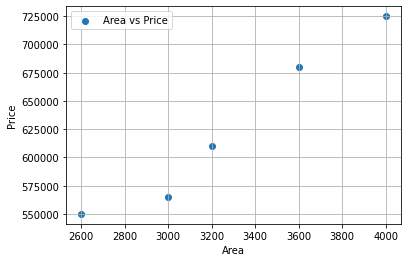

In [85]:
plt.scatter(x,y,label="Area vs Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

## Simple Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
m1 = LinearRegression()

In [88]:
m1.fit(x,y)

LinearRegression()

In [89]:
y__pred = m1.predict(x)

In [90]:
print(y__pred)

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [91]:
df['Predicted Price'] = y__pred

In [92]:
df.head()

,Area (sqft),Price,Predicted Price
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


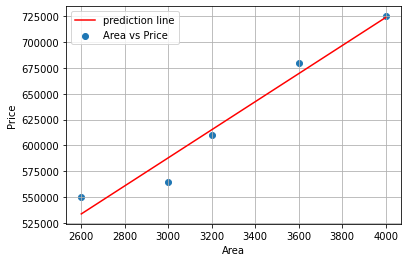

In [93]:
plt.scatter(x,y,label="Area vs Price")
plt.plot(x,df['Predicted Price'],c='red',label='prediction line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

In [94]:
y_pred_price = m1.predict([[2000]])
print(y_pred_price)

[452191.78082192]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
import pickle

In [96]:
pickle.dump(m1,open("linearmodel.pkl","wb"))

In [97]:
linear_model = pickle.load(open("linearmodel.pkl","rb"))

In [98]:
model_pred = linear_model.predict([[2000]])
print(model_pred)

[452191.78082192]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [100]:
mae = mean_absolute_error(y,y__pred)
mse = mean_squared_error(y,y__pred)
rmse = np.sqrt(mse)
r2s = r2_score(y,y__pred)
print("Mean Absolute Error : ",mae)
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("R 2 Score : ",r2s)

Mean Absolute Error :  11246.57534246575
Mean Squared Error :  186815068.4931509
Root Mean Squared Error :  13668.030893042014
R 2 Score :  0.9584301138199486


## Multi Linear Regression


In [173]:
dff = pd.read_csv("/content/drive/MyDrive/ML/House-Price-Prediction/Mhouse.csv")

In [174]:
dff.head()

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [179]:
mean_value = dff['bedroom'].median()

In [180]:
print(mean_value)

4.0


In [181]:
dff['bedroom'].fillna(mean_value,inplace=True)

In [182]:
dff

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [183]:
xx = dff.iloc[:,:3]

In [184]:
print(xx)

   area  bedroom  age
0  2600      3.0   20
1  3000      4.0   15
2  3200      4.0   18
3  3600      3.0   30
4  4000      5.0    8
5  4100      6.0    8


In [185]:
type(xx)

pandas.core.frame.DataFrame

In [190]:
yy = dff.iloc[:,-1]

In [191]:
print(yy)


0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [192]:
type(yy)

pandas.core.series.Series

In [193]:
m2 = LinearRegression()

In [196]:
m2.fit(xx,yy)

LinearRegression()

In [198]:
y___pred = m2.predict(xx)

In [199]:
dff['Price Prediction'] = y___pred

In [200]:
dff.head()

,area,bedroom,age,price,Price Prediction
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755


In [208]:
yy_pred = m2.predict([[2000,2,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [209]:
print(yy_pred)

[443749.87727606]


In [211]:
pickle.dump(m2,open('multilinear.pkl','wb'))

In [213]:
multimodel = pickle.load(open('multilinear.pkl','rb'))

In [215]:
model_pred = multimodel.predict([[2000,2,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [216]:
print(model_pred)

[443749.87727606]


In [201]:
mae = mean_absolute_error(yy,y___pred)
mse = mean_squared_error(yy,y___pred)
rmse = np.sqrt(mse)
r2s = r2_score(yy,y___pred)
print("Mean Absolute Error : ",mae)
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("R 2 Score : ",r2s)

Mean Absolute Error :  15507.938665720052
Mean Squared Error :  446305128.2244909
Root Mean Squared Error :  21125.934966871664
R 2 Score :  0.9550196399325821
